In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
data = pd.read_csv("train_BRCpofr.csv")

In [3]:
data.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736


In [4]:
data.shape

(89392, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89392 entries, 0 to 89391
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              89392 non-null  int64 
 1   gender          89392 non-null  object
 2   area            89392 non-null  object
 3   qualification   89392 non-null  object
 4   income          89392 non-null  object
 5   marital_status  89392 non-null  int64 
 6   vintage         89392 non-null  int64 
 7   claim_amount    89392 non-null  int64 
 8   num_policies    89392 non-null  object
 9   policy          89392 non-null  object
 10  type_of_policy  89392 non-null  object
 11  cltv            89392 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 8.2+ MB


In [6]:
data.drop("id", axis = 1, inplace = True)

In [7]:
data_cat = [var for var in data.columns if data[var].dtype == 'O']
print('There are {} categorical variables in Data \n'.format(len(data_cat)))
print('Categorical Variables are :', data_cat)

There are 7 categorical variables in Data 

Categorical Variables are : ['gender', 'area', 'qualification', 'income', 'num_policies', 'policy', 'type_of_policy']


In [8]:
data_num = [var for var in data.columns if data[var].dtype != 'O']
print('There are {} categorical variables in Data \n'.format(len(data_num)))
print('Categorical Variables are :', data_num)

There are 4 categorical variables in Data 

Categorical Variables are : ['marital_status', 'vintage', 'claim_amount', 'cltv']


In [9]:
print("The total number of Columns in Data are :", len(data.columns))

The total number of Columns in Data are : 11


### Categorical

Gender

In [10]:
print("Null Value in Gender :", data['gender'].isnull().sum())
print("Number of Unique Values in Gender :", data['gender'].nunique())

Null Value in Gender : 0
Number of Unique Values in Gender : 2


In [11]:
data['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [12]:
print("Number of Male and Females in Gender are :\n", data['gender'].value_counts())

Number of Male and Females in Gender are :
 Male      50497
Female    38895
Name: gender, dtype: int64


In [13]:
# Percentage of Males and Females in Gender

countMale = len(data[data.gender == 'Male'])
countFemale = len(data[data.gender == 'Female'])
countNull = len(data[data.gender.isnull()])

print("Percentage of Male applicant: {:.2f}%".format((countMale / (len(data.gender)))*100))
print("Percentage of Female applicant: {:.2f}%".format((countFemale / (len(data.gender)))*100))
print("Missing values percentage: {:.2f}%".format((countNull / (len(data.gender)))*100))

Percentage of Male applicant: 56.49%
Percentage of Female applicant: 43.51%
Missing values percentage: 0.00%


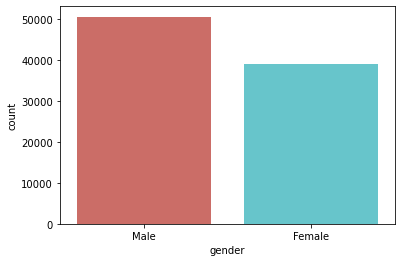

In [14]:
sns.countplot(x = "gender", data = data, palette = "hls")
plt.show()

area

In [15]:
print("Null Value in area :", data['area'].isnull().sum())
print("Number of Unique Values in area :", data['area'].nunique())

Null Value in area : 0
Number of Unique Values in area : 2


In [16]:
data['area'].unique()

array(['Urban', 'Rural'], dtype=object)

In [17]:
print("Number of Urban and Rural in Area are :\n", data['area'].value_counts())

Number of Urban and Rural in Area are :
 Urban    62455
Rural    26937
Name: area, dtype: int64


In [18]:
countUrban = len(data[data.area == 'Urban'])
countRural = len(data[data.area == 'Rural'])
countNull = len(data[data.area.isnull()])

print("Percentage of Urban: {:.2f}%".format((countUrban / (len(data.area)))*100))
print("Percentage of Rural: {:.2f}%".format((countRural / (len(data.area)))*100))
print("Missing values percentage: {:.2f}%".format((countNull / (len(data.area)))*100))

Percentage of Urban: 69.87%
Percentage of Rural: 30.13%
Missing values percentage: 0.00%


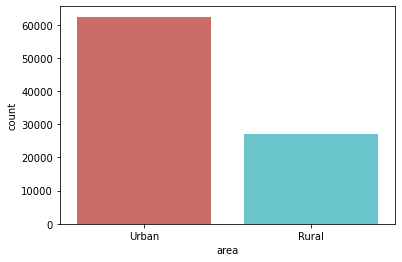

In [19]:
sns.countplot(x = "area", data = data, palette = "hls")
plt.show()

qualification 

In [20]:
print("Null Value in Qualification :", data['qualification'].isnull().sum())
print("Number of Unique Values in Qualification :", data['qualification'].nunique())

Null Value in Qualification : 0
Number of Unique Values in Qualification : 3


In [21]:
data['qualification'].unique()

array(['Bachelor', 'High School', 'Others'], dtype=object)

In [22]:
print("Number of Bachelor, High School and Others in Qualification are :\n", data['qualification'].value_counts())

Number of Bachelor, High School and Others in Qualification are :
 High School    46247
Bachelor       39399
Others          3746
Name: qualification, dtype: int64


In [23]:
countBachelor = len(data[data.qualification == 'Bachelor'])
countHigh_School = len(data[data.qualification == 'High School'])
countOthers = len(data[data.qualification == 'Others'])
countNull = len(data[data.qualification.isnull()])

print("Percentage of Bachelor: {:.2f}%".format((countBachelor / (len(data.qualification)))*100))
print("Percentage of High School: {:.2f}%".format((countHigh_School / (len(data.qualification)))*100))
print("Percentage of Others: {:.2f}%".format((countOthers / (len(data.qualification)))*100))
print("Missing values percentage: {:.2f}%".format((countNull / (len(data.qualification)))*100))

Percentage of Bachelor: 44.07%
Percentage of High School: 51.74%
Percentage of Others: 4.19%
Missing values percentage: 0.00%


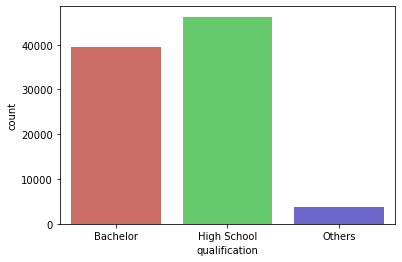

In [24]:
sns.countplot(x = "qualification", data = data, palette = "hls")
plt.show()

Income

In [25]:
print("Null Value in Income :", data['income'].isnull().sum())
print("Number of Unique Values in Income :", data['income'].nunique())

Null Value in Income : 0
Number of Unique Values in Income : 4


In [26]:
data['income'].unique()

array(['5L-10L', 'More than 10L', '2L-5L', '<=2L'], dtype=object)

In [27]:
print("Count of Income Categories: \n", data['income'].value_counts())

Count of Income Categories: 
 5L-10L           52716
2L-5L            21158
More than 10L    13664
<=2L              1854
Name: income, dtype: int64


In [28]:
print("Precentage of Income categories:")
round((data['income'].value_counts() / len(data.income))*100, 2)

Precentage of Income categories:


5L-10L           58.97
2L-5L            23.67
More than 10L    15.29
<=2L              2.07
Name: income, dtype: float64

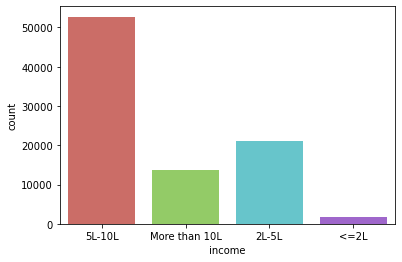

In [29]:
sns.countplot(x = "income", data = data, palette = "hls")
plt.show()

num_policies

In [30]:
print("Null Value in num_policies :", data['num_policies'].isnull().sum())
print("Number of Unique Values in num_policies :", data['num_policies'].nunique())

Null Value in num_policies : 0
Number of Unique Values in num_policies : 2


In [31]:
data['num_policies'].unique()

array(['More than 1', '1'], dtype=object)

In [32]:
print("Count of More than 1 and 1 in num_policies are :\n", data['num_policies'].value_counts())

Count of More than 1 and 1 in num_policies are :
 More than 1    60263
1              29129
Name: num_policies, dtype: int64


In [33]:
countMore_than_1 = len(data[data.num_policies == 'More than 1'])
count1 = len(data[data.num_policies == "1"])
countNull = len(data[data.num_policies.isnull()])

print("Percentage of More than 1: {:.2f}%".format((countMore_than_1 / (len(data.num_policies)))*100))
print("Percentage of 1: {:.2f}%".format((count1 / (len(data.num_policies)))*100))
print("Missing values percentage: {:.2f}%".format((countNull / (len(data.num_policies)))*100))

Percentage of More than 1: 67.41%
Percentage of 1: 32.59%
Missing values percentage: 0.00%


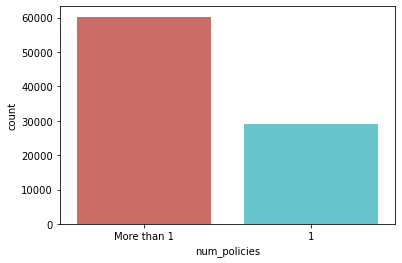

In [34]:
sns.countplot(x = "num_policies", data = data, palette = "hls")
plt.show()

policy

In [35]:
print("Null Value in policy :", data['policy'].isnull().sum())
print("Number of Unique Values in policy :", data['policy'].nunique())

Null Value in policy : 0
Number of Unique Values in policy : 3


In [36]:
data['policy'].unique()

array(['A', 'C', 'B'], dtype=object)

In [37]:
print("Count of A, B and C in policy are :\n", data['policy'].value_counts())

Count of A, B and C in policy are :
 A    56644
B    24635
C     8113
Name: policy, dtype: int64


In [38]:
countA = len(data[data.policy == 'A'])
countB = len(data[data.policy == "B"])
countC = len(data[data.policy == "C"])
countNull = len(data[data.policy.isnull()])

print("Percentage of A: {:.2f}%".format((countA / (len(data.policy)))*100))
print("Percentage of B: {:.2f}%".format((countB / (len(data.policy)))*100))
print("Percentage of C: {:.2f}%".format((countC / (len(data.policy)))*100))
print("Missing values percentage: {:.2f}%".format((countNull / (len(data.policy)))*100))

Percentage of A: 63.37%
Percentage of B: 27.56%
Percentage of C: 9.08%
Missing values percentage: 0.00%


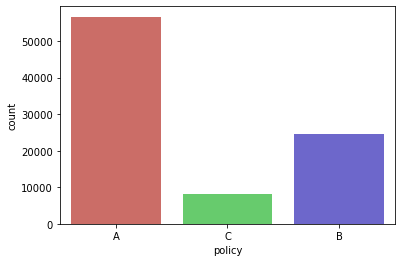

In [39]:
sns.countplot(x = "policy", data = data, palette = "hls")
plt.show()

type_of_policy

In [40]:
print("Null Value in Type of Policy :", data['type_of_policy'].isnull().sum())
print("Number of Unique Values in Type of Policy :", data['type_of_policy'].nunique())

Null Value in Type of Policy : 0
Number of Unique Values in Type of Policy : 3


In [41]:
data['type_of_policy'].unique()

array(['Platinum', 'Gold', 'Silver'], dtype=object)

In [42]:
print("Count of Platinum, Gold and Silver in policy are :\n", data['type_of_policy'].value_counts())

Count of Platinum, Gold and Silver in policy are :
 Platinum    47796
Silver      21010
Gold        20586
Name: type_of_policy, dtype: int64


In [43]:
countPlatinum = len(data[data.type_of_policy == 'Platinum'])
countGold = len(data[data.type_of_policy == "Gold"])
countSilver = len(data[data.type_of_policy == "Silver"])
countNull = len(data[data.type_of_policy.isnull()])

print("Percentage of Platinum: {:.2f}%".format((countPlatinum / (len(data.type_of_policy)))*100))
print("Percentage of Gold: {:.2f}%".format((countGold / (len(data.type_of_policy)))*100))
print("Percentage of Silver: {:.2f}%".format((countSilver / (len(data.type_of_policy)))*100))
print("Missing values percentage: {:.2f}%".format((countNull / (len(data.type_of_policy)))*100))

Percentage of Platinum: 53.47%
Percentage of Gold: 23.03%
Percentage of Silver: 23.50%
Missing values percentage: 0.00%


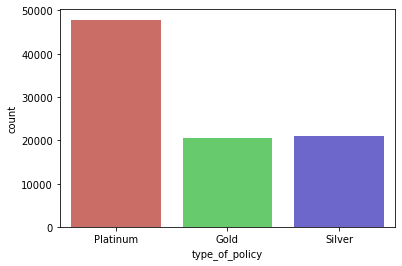

In [44]:
sns.countplot(x = "type_of_policy", data = data, palette = "hls")
plt.show()

### Numerical

In [45]:
data[data_num].describe()

,marital_status,vintage,claim_amount,cltv
count,89392.000000,89392.000000,89392.000000,89392.000000
mean,0.575488,4.595669,4351.502416,97952.828978
std,0.494272,2.290446,3262.359775,90613.814793
min,0.000000,0.000000,0.000000,24828.000000
25%,0.000000,3.000000,2406.000000,52836.000000
50%,1.000000,5.000000,4089.000000,66396.000000
75%,1.000000,6.000000,6094.000000,103440.000000
max,1.000000,8.000000,31894.000000,724068.000000


marital_status =>
1: married
0: single

In [46]:
print("Null Value in marital_status :", data['marital_status'].isnull().sum())
print("Number of Unique Values in marital_status :", data['marital_status'].nunique())

Null Value in marital_status : 0
Number of Unique Values in marital_status : 2


In [47]:
data['marital_status'].describe()

count    89392.000000
mean         0.575488
std          0.494272
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: marital_status, dtype: float64

In [48]:
print("Number of married and unmarried in marital_status are :\n", data['marital_status'].value_counts())

Number of married and unmarried in marital_status are :
 1    51444
0    37948
Name: marital_status, dtype: int64


In [49]:
countMarried = len(data[data.marital_status == 1])
countUnmarried = len(data[data.marital_status == 0])
countNull = len(data[data.marital_status.isnull()])

print("Percentage of Married: {:.2f}%".format((countMarried / (len(data.marital_status)))*100))
print("Percentage of Unmarried: {:.2f}%".format((countUnmarried / (len(data.marital_status)))*100))
print("Missing values percentage: {:.2f}%".format((countNull / (len(data.marital_status)))*100))

Percentage of Married: 57.55%
Percentage of Unmarried: 42.45%
Missing values percentage: 0.00%


Text(0.5, 0, 'marital_status')

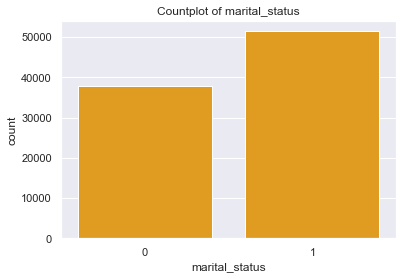

In [50]:
sns.set(style="darkgrid")
ax = sns.countplot(x="marital_status", data = data, color='orange')
ax.set_title('Countplot of marital_status')
ax.set_xlabel('marital_status')

vintage

In [51]:
print("Null Value in vintage :", data['vintage'].isnull().sum())
print("Number of Unique Values in vintage :", data['vintage'].nunique())

Null Value in vintage : 0
Number of Unique Values in vintage : 9


In [52]:
data['vintage'].describe()

count    89392.000000
mean         4.595669
std          2.290446
min          0.000000
25%          3.000000
50%          5.000000
75%          6.000000
max          8.000000
Name: vintage, dtype: float64

In [53]:
print("Count of vintage Categories: \n", data['vintage'].value_counts())

Count of vintage Categories: 
 6    17769
7    13095
5    12481
4    10471
2     9165
1     7671
8     7624
3     7085
0     4031
Name: vintage, dtype: int64


In [54]:
print("Precentage of vintage categories:")
round((data['vintage'].value_counts() / len(data.vintage))*100, 2)

Precentage of vintage categories:


6    19.88
7    14.65
5    13.96
4    11.71
2    10.25
1     8.58
8     8.53
3     7.93
0     4.51
Name: vintage, dtype: float64

Text(0.5, 0, 'vintage')

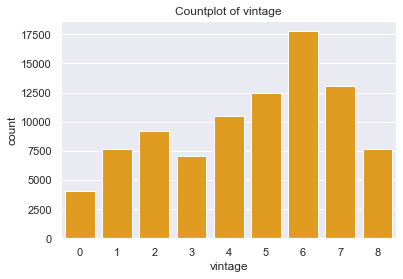

In [55]:
sns.set(style="darkgrid")
ax = sns.countplot(x="vintage", data = data, color='orange')
ax.set_title('Countplot of vintage')
ax.set_xlabel('vintage')

claim_amount

In [56]:
print("Null Value in claim_amount :", data['claim_amount'].isnull().sum())
print("Number of Unique Values in claim_amount :", data['claim_amount'].nunique())

Null Value in claim_amount : 0
Number of Unique Values in claim_amount : 10889


In [57]:
data['claim_amount'].describe()

count    89392.000000
mean      4351.502416
std       3262.359775
min          0.000000
25%       2406.000000
50%       4089.000000
75%       6094.000000
max      31894.000000
Name: claim_amount, dtype: float64

Text(0, 0.5, 'claim_amount')

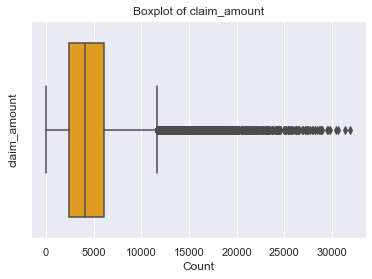

In [58]:
sns.set(style="darkgrid")
ax = sns.boxplot(x="claim_amount", data = data, color='orange')
ax.set_title('Boxplot of claim_amount')
ax.set_xlabel('Count')
ax.set_ylabel('claim_amount')

### OUTLIERS

In [59]:
def outliers(df,col):
        IQR=df[col].quantile(0.75)-df[col].quantile(0.25)
        LW=df[col].quantile(0.25)-(IQR*1.5)
        UW=df[col].quantile(0.75)+(IQR*1.5)
        print("For feature {} Lower Whisker is {} and Upper Whisker is {} \n".format(col,LW,UW))


In [60]:
outliers(data, "claim_amount")

For feature claim_amount Lower Whisker is -3126.0 and Upper Whisker is 11626.0 



In [61]:
IQR=data.claim_amount.quantile(0.75)-data.claim_amount.quantile(0.25)

In [62]:
LW=data.claim_amount.quantile(0.25)-(IQR*1.5)

In [63]:
UW=data.claim_amount.quantile(0.75)+(IQR*1.5)

In [64]:
count = 0
for i in range(0, len(data)):
    if (data.claim_amount[i]<LW):
        count+=1

In [65]:
count

0

In [66]:
count2 = 0
for i in range(0, len(data)):
    if (data.claim_amount[i]>UW):
        count2 += 1

In [67]:
count2

2258

In [68]:
count2/len(data)

0.02525953105423304

In [69]:
data = data[data["claim_amount"]<=UW]

In [70]:
data.shape

(87134, 11)

In [71]:
data.head(50)

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736
5,Male,Rural,High School,More than 10L,1,1,0,1,C,Gold,348768
6,Female,Rural,Bachelor,5L-10L,1,6,0,More than 1,A,Gold,238920
7,Female,Urban,High School,5L-10L,0,0,5473,More than 1,A,Silver,64128
8,Female,Urban,High School,5L-10L,1,3,6105,More than 1,A,Gold,94536
9,Male,Rural,High School,More than 10L,1,6,0,More than 1,A,Platinum,99060


## Encoding

In [72]:
data["gender"]=data["gender"].apply(lambda x:1 if x=="Male" else 0)
data["gender"]

0        1
1        1
2        1
3        0
4        1
        ..
89387    1
89388    1
89389    0
89390    0
89391    0
Name: gender, Length: 87134, dtype: int64

In [73]:
data["area"]=data["area"].apply(lambda x:1 if x=="Urban" else 0)
data["area"]

0        1
1        0
2        1
3        0
4        1
        ..
89387    0
89388    1
89389    1
89390    0
89391    0
Name: area, Length: 87134, dtype: int64

In [74]:
data['qualification']= label_encoder.fit_transform(data['qualification'])
data['qualification']

0        0
1        1
2        0
3        1
4        1
        ..
89387    1
89388    0
89389    0
89390    1
89391    1
Name: qualification, Length: 87134, dtype: int32

In [75]:
data['income']= label_encoder.fit_transform(data['income'])
data['income']

0        1
1        1
2        1
3        1
4        3
        ..
89387    3
89388    1
89389    1
89390    0
89391    1
Name: income, Length: 87134, dtype: int32

In [76]:
data["num_policies"]=data["num_policies"].apply(lambda x:1 if x=="More than 1" else 0)
data["num_policies"]

0        1
1        1
2        1
3        1
4        1
        ..
89387    1
89388    1
89389    1
89390    1
89391    1
Name: num_policies, Length: 87134, dtype: int64

In [77]:
data['policy']= label_encoder.fit_transform(data['policy'])
data['policy']

0        0
1        0
2        0
3        0
4        0
        ..
89387    1
89388    0
89389    1
89390    1
89391    1
Name: policy, Length: 87134, dtype: int32

In [78]:
data['type_of_policy']= label_encoder.fit_transform(data['type_of_policy'])
data['type_of_policy']

0        1
1        1
2        1
3        1
4        0
        ..
89387    1
89388    1
89389    1
89390    1
89391    0
Name: type_of_policy, Length: 87134, dtype: int32

## Correlation Analysis

In [79]:
data.corr()

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
gender,1.000000,0.040759,-0.033076,-0.007525,0.071220,0.004481,0.041740,-0.055700,0.009224,-0.010774,-0.004505
area,0.040759,1.000000,0.022190,-0.204335,-0.045715,0.001399,0.489954,0.118372,-0.108234,-0.027455,0.130126
qualification,-0.033076,0.022190,1.000000,0.001017,-0.013151,-0.027292,0.030846,-0.046918,-0.013447,-0.032254,-0.022182
income,-0.007525,-0.204335,0.001017,1.000000,0.015668,-0.012072,-0.170573,-0.046733,-0.032503,-0.025488,-0.059794
marital_status,0.071220,-0.045715,-0.013151,0.015668,1.000000,-0.011115,-0.104854,-0.079927,-0.016150,-0.006695,-0.075434
vintage,0.004481,0.001399,-0.027292,-0.012072,-0.011115,1.000000,0.006100,0.051055,0.044496,0.009285,0.021363
claim_amount,0.041740,0.489954,0.030846,-0.170573,-0.104854,0.006100,1.000000,0.147386,-0.125891,-0.023321,0.176083
num_policies,-0.055700,0.118372,-0.046918,-0.046733,-0.079927,0.051055,0.147386,1.000000,-0.010003,-0.033298,0.361234
policy,0.009224,-0.108234,-0.013447,-0.032503,-0.016150,0.044496,-0.125891,-0.010003,1.000000,0.067468,-0.012574
type_of_policy,-0.010774,-0.027455,-0.032254,-0.025488,-0.006695,0.009285,-0.023321,-0.033298,0.067468,1.000000,-0.026472


In [80]:
data.corr()["cltv"]

gender           -0.004505
area              0.130126
qualification    -0.022182
income           -0.059794
marital_status   -0.075434
vintage           0.021363
claim_amount      0.176083
num_policies      0.361234
policy           -0.012574
type_of_policy   -0.026472
cltv              1.000000
Name: cltv, dtype: float64

<AxesSubplot:>

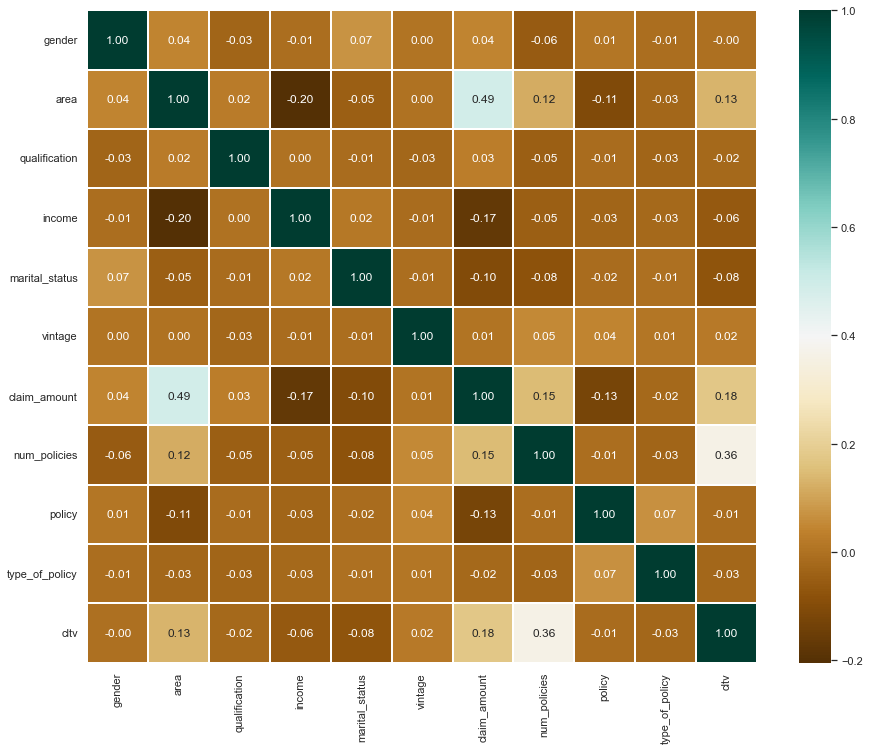

In [81]:
plt.figure(figsize = (15,12))
sns.heatmap(data.corr(), annot = True, fmt = '.2f', cmap = 'BrBG', linewidths = 2)

## Splitting Data

In [82]:
X = data.drop("cltv", axis=1)
y = data["cltv"]

### Train-Test Split

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [84]:
X_train.shape, X_test.shape

((60993, 10), (26141, 10))

In [85]:
X_train.head()

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
10309,1,1,1,1,1,7,6385,0,2,2
60449,0,0,2,3,1,5,0,0,0,2
47583,0,1,1,0,1,8,9787,1,1,0
30762,0,1,1,1,1,2,7540,1,0,1
8349,1,1,0,1,1,6,2994,0,1,0


In [86]:
X_test.head()

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
15309,1,1,1,1,1,5,4047,1,0,0
88040,0,1,0,0,1,6,3487,1,0,2
67679,0,0,0,3,1,7,2943,1,1,2
30198,1,1,0,0,1,5,6062,0,2,0
69446,0,1,0,0,0,4,5256,1,1,1


## Models

### OLS

In [87]:
import statsmodels.api as sm

In [88]:
x = sm.add_constant(X)

In [89]:
result = sm.OLS(y, x).fit()

In [90]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   cltv   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     1525.
Date:                Sun, 22 Jan 2023   Prob (F-statistic):               0.00
Time:                        22:55:50   Log-Likelihood:            -1.1102e+06
No. Observations:               87134   AIC:                         2.220e+06
Df Residuals:                   87123   BIC:                         2.220e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           4.244e+04   1241.902     34.

### Gradient Boost

In [97]:
from sklearn.ensemble import GradientBoostingRegressor

In [202]:
gbr = GradientBoostingRegressor(n_estimators=600, max_depth=5, learning_rate=0.01, min_samples_split=500)

In [203]:
gbr.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=5,
                          min_samples_split=500, n_estimators=600)

In [204]:
y_pred = gbr.predict(X_test)

In [205]:
metrics.r2_score(y_test, y_pred)

0.15903233615345846

## Test Data

In [195]:
Test_Data = pd.read_csv("test_koRSKBP.csv")

In [196]:
data_id = Test_Data["id"]

In [158]:
Test_Data = Test_Data.drop("id", axis = 1)

In [160]:
Test_Data.head()

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
0,Female,Rural,High School,5L-10L,0,6,2134,More than 1,B,Silver
1,Female,Urban,High School,2L-5L,0,4,4102,More than 1,A,Platinum
2,Male,Rural,High School,5L-10L,1,7,2925,More than 1,B,Gold
3,Female,Rural,Bachelor,More than 10L,1,2,0,More than 1,B,Silver
4,Female,Urban,High School,2L-5L,0,5,14059,More than 1,B,Silver


### Encoding

In [161]:
Test_Data["gender"]=Test_Data["gender"].apply(lambda x:1 if x=="Male" else 0)
Test_Data["gender"]

0        0
1        0
2        1
3        0
4        0
        ..
59590    1
59591    1
59592    0
59593    1
59594    0
Name: gender, Length: 59595, dtype: int64

In [162]:
Test_Data["area"]=Test_Data["area"].apply(lambda x:1 if x=="Urban" else 0)
Test_Data["area"]

0        0
1        1
2        0
3        0
4        1
        ..
59590    0
59591    1
59592    1
59593    0
59594    1
Name: area, Length: 59595, dtype: int64

In [163]:
Test_Data['qualification']= label_encoder.fit_transform(Test_Data['qualification'])
Test_Data['qualification']

0        1
1        1
2        1
3        0
4        1
        ..
59590    0
59591    1
59592    1
59593    0
59594    0
Name: qualification, Length: 59595, dtype: int32

In [164]:
Test_Data['income']= label_encoder.fit_transform(Test_Data['income'])
Test_Data['income']

0        1
1        0
2        1
3        3
4        0
        ..
59590    1
59591    1
59592    0
59593    1
59594    1
Name: income, Length: 59595, dtype: int32

In [165]:
Test_Data["num_policies"]=Test_Data["num_policies"].apply(lambda x:1 if x=="More than 1" else 0)
Test_Data["num_policies"]

0        1
1        1
2        1
3        1
4        1
        ..
59590    0
59591    0
59592    1
59593    1
59594    1
Name: num_policies, Length: 59595, dtype: int64

In [166]:
Test_Data['policy']= label_encoder.fit_transform(Test_Data['policy'])
Test_Data['policy']

0        1
1        0
2        1
3        1
4        1
        ..
59590    0
59591    2
59592    1
59593    0
59594    1
Name: policy, Length: 59595, dtype: int32

In [167]:
Test_Data['type_of_policy']= label_encoder.fit_transform(Test_Data['type_of_policy'])
Test_Data['type_of_policy']

0        2
1        1
2        0
3        2
4        2
        ..
59590    2
59591    0
59592    1
59593    2
59594    1
Name: type_of_policy, Length: 59595, dtype: int32

In [168]:
predictions = gbr.predict(Test_Data)

In [169]:
predictions

array([ 92243.35039418, 125616.29321115, 100444.39239262, ...,
       107123.32543092, 106877.76530669, 116289.1844942 ])

In [191]:
prediction = pd.DataFrame(predictions)

In [192]:
prediction

,0
0,92243.350394
1,125616.293211
2,100444.392393
3,86390.638090
4,213771.702555
...,...
59590,47481.601187
59591,51303.282561
59592,107123.325431
59593,106877.765307


In [193]:
prediction.to_csv('prediction.csv')

In [197]:
data_id.to_csv('data_id.csv')